# Course 2: Python Project 04

# Week 04: Graded Project

# JANANI L

# GREAT LEARNING CAREER ACADEMY

# EDA & Data Preprocessing on Google App Store Rating Dataset

### Domain: Mobile device apps

Objective:   The Goal is to explore the data and pre-process it for future use in any predictive analytics study. 
    
    
Data set Information:     Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for category, rating, size, and more.

### 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
#Reading the dataset
df = pd.read_csv('Google_playstore_appdata.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
df.head()
#the first few samples

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#shape of the data
df.shape

(10841, 13)

In [6]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
#The data consists of 10841 rows and 13 columns.
#Considering the columns only 'Rating' is in float64 datatype rest all of them are in object datatypes.


### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [8]:
df.describe()
#summary statistics of the dataset

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
print(df.describe(include="object"))

           App Category Reviews                Size    Installs   Type  Price  \
count    10841    10841   10841               10841       10841  10840  10841   
unique    9660       34    6002                 462          22      3     93   
top     ROBLOX   FAMILY       0  Varies with device  1,000,000+   Free      0   
freq         9     1972     596                1695        1579  10039  10040   

       Content Rating Genres    Last Updated         Current Ver Android Ver  
count           10840  10841           10841               10833       10838  
unique              6    120            1378                2832          33  
top          Everyone  Tools  August 3, 2018  Varies with device  4.1 and up  
freq             8714    842             326                1459        2451  


In [10]:
print(df.describe(include="all"))

           App Category       Rating Reviews                Size    Installs  \
count    10841    10841  9367.000000   10841               10841       10841   
unique    9660       34          NaN    6002                 462          22   
top     ROBLOX   FAMILY          NaN       0  Varies with device  1,000,000+   
freq         9     1972          NaN     596                1695        1579   
mean       NaN      NaN     4.193338     NaN                 NaN         NaN   
std        NaN      NaN     0.537431     NaN                 NaN         NaN   
min        NaN      NaN     1.000000     NaN                 NaN         NaN   
25%        NaN      NaN     4.000000     NaN                 NaN         NaN   
50%        NaN      NaN     4.300000     NaN                 NaN         NaN   
75%        NaN      NaN     4.500000     NaN                 NaN         NaN   
max        NaN      NaN    19.000000     NaN                 NaN         NaN   

         Type  Price Content Rating Gen

Columns that need to be worked upon for model building

The columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' are not relevant for our observations.

The columns 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price' and 'Content Rating' are relevant for our model building. Of these columns only 'Rating' is in float data type and the rest is in object data type, so well change according to our requirement.

There seems to be an enormus number of null values in the 'Rating' column, we'll have to deal with that too.


In [11]:
#Category Column - Important to have. Requires feature engineering
#Reviews - Need to convert it to numeric column
#Installs - Need to convert it to numeric column
#Type - Convert it to numeric
#Price - Need to remove $ from the values and make it numeric
#Content Rating - Requires encoding

### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [12]:
df.duplicated().sum()


483

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them

In [15]:
#Reading the dataset
df = pd.read_csv('Google_playstore_appdata.csv')

In [16]:
print(df['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [17]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [18]:
#There is an invalid category named "1.9". We drop that category.
df[df['Category']=='1.9'].index

Int64Index([10472], dtype='int64')

In [19]:
df.drop(index=10472, axis=0)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [20]:
df.drop([10472],inplace=True)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [21]:
 # Check missing values in 'Rating' column
print(df['Rating'].isnull().sum())

1474


In [22]:
# Drop missing values in 'Rating' column
df.dropna(subset=['Rating'], inplace=True)

In [23]:
# Create 'Rating_category' column
df['Rating_category'] = np.where(df['Rating'] > 3.5, 'High', 'Low')

In [24]:
df['Rating_category']

0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating_category, Length: 9366, dtype: object

### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution

In [25]:
df['Rating_category'].value_counts(normalize = True)*100

High    90.433483
Low      9.566517
Name: Rating_category, dtype: float64

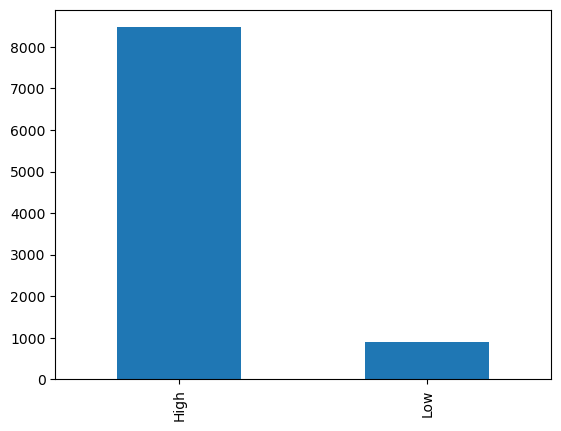

In [26]:
df['Rating_category'].value_counts().plot(kind = 'bar')
plt.show()

In [27]:
#comment on the distribution
#In 'Rating category' there are more number of high's than low's
#The target class is highly imbalanced.

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [28]:
# Convert 'Reviews' to numeric data type
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Reviews'] 

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 9366, dtype: int64

In [29]:
df['Reviews'].dtype

dtype('int64')

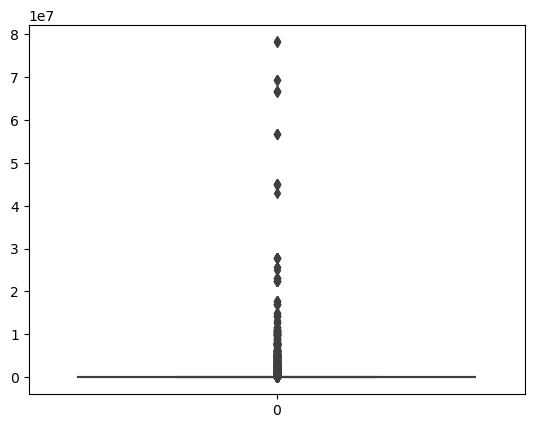

In [30]:
#check the presence of outliers in the column
sns.boxplot(df['Reviews'])
plt.show()

#As we can observe the column reviews have high positive skewness. Lets reduce the skewness using log transformation approach.

In [31]:
# Handle outliers using log transformation
df['Reviews'] = np.log1p(df['Reviews'])

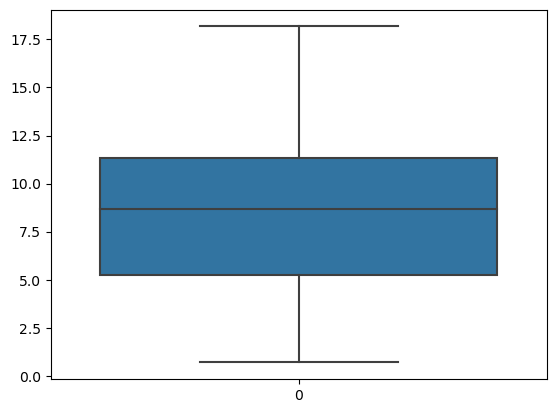

In [32]:
sns.boxplot(df['Reviews'])
plt.show()

#As we can observe after log transformation the column reviews is been normally distributed and free of outliers.

In [33]:
# Print the DataFrame after handling outliers with log transformation
print(df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating    Reviews   

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [34]:
df['Size'].head(5)

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [35]:
df = df[df['Size'] != 'Varies with device']

In [36]:
#treat the non numeric data and convert the column into suitable data type. 
def convert(entry):
        if entry[-1] == 'k':
            new_entry = float(entry.replace('k',''))*1000
        else:
            new_entry = float(entry.replace('M',''))*1000000
        return new_entry

In [37]:
df['Size'] = df['Size'].apply(lambda x : convert(x))

In [38]:
df['Size'].head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [39]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [40]:
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','')

In [41]:
#convert the column into a suitable data type.
df['Installs'] = pd.to_numeric(df['Installs'], errors = 'coerce')

In [42]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [43]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [44]:
df['Price'] = df['Price'].str.replace('$', '')

In [45]:
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')

In [46]:
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [47]:
#Drop the columns which you think redundant for the analysis
df = df.drop(['App','Rating','Genres','Last Updated', 'Current Ver','Android Ver' ], axis = 1)

In [48]:
df.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,High


### 13. Encode the categorical columns.

In [49]:
## Encoding categorical variables using label encoder

## select object datatype variables
object_type_variables = [i for i in df.columns if df.dtypes[i] == object]
object_type_variables 


le = LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q = le.fit_transform(df[i].astype(str))  
        df[i] = q                               
        df[i] = df[i].astype(int)
encoder(df)

In [50]:
df.head(2)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.075174,19000000.0,10000,0,0.0,1,0
1,0,6.875232,14000000.0,500000,0,0.0,1,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [51]:
X = df.drop('Rating_category',axis=1)
y = df['Rating_category']

### 15. Split the dataset into train and test.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5410, 7) (2319, 7)
(5410,) (2319,)


### 16. Standardize the data, so that the values are within a particular range.

In [53]:
mm = MinMaxScaler()

X_train.iloc[:,:] = mm.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = mm.transform(X_test.iloc[:,:])

In [54]:
X_train.head(2)
## just checking few samples after scaling

,Category,Reviews,Size,Installs,Type,Price,Content Rating
8421,0.34375,0.66624,0.269938,9.999999e-03,0.0,0.0,0.2
8216,0.90625,0.08190,0.051919,4.990000e-07,0.0,0.0,0.2


In [55]:
X_test.head(2)
## just checking few samples after scaling


,Category,Reviews,Size,Installs,Type,Price,Content Rating
3059,0.87500,0.232287,0.038918,0.00001,0.0,0.0,0.2
5668,0.34375,0.229923,0.038918,0.00001,0.0,0.0,0.2


Conclusion

Exploratory Data Analysis & Data Preprocessing on Google App Store Rating Dataset has been done using necessary libraries in python.